In [ ]:
# importing modules
import numpy as np
import pandas as pd
import seaborn as sns
import scipy as sp
import matplotlib.pyplot as plt

from scipy import stats
from scipy import optimize
from scipy.optimize import curve_fit
from scipy import fftpack
from scipy.integrate import cumulative_trapezoid
from scipy.interpolate import interp1d

In [ ]:
task4_5Ohm = pd.read_csv('https://raw.githubusercontent.com/anasroumeih/Lab2/main/task4_5Ohm3.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0).astype(float)
task4_165Ohm = pd.read_csv('https://raw.githubusercontent.com/anasroumeih/Lab2/main/task4_165Ohm.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0).astype(float)
task4_5Ohms = pd.read_csv('https://raw.githubusercontent.com/anasroumeih/Lab2/main/task4_5Ohm3.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0).astype(float)


In [ ]:
task4_5Ohm.head()

,Time,Channel B
1,-5.00348,-5.030671
2,-5.00220,-5.030671
3,-5.00092,-5.030671
4,-4.99964,-5.030671
5,-4.99836,-5.030671


In [ ]:
task4_5Ohm_time = np.array(task4_5Ohm['Time'])*10**(-3)
task4_5Ohm_time = task4_5Ohm_time[4075:4550]
task4_5Ohm_time = task4_5Ohm_time - task4_5Ohm_time[0]
task4_5Ohm_volt = np.array(task4_5Ohm['Channel B'])
task4_5Ohm_volt = task4_5Ohm_volt[4075:4550]

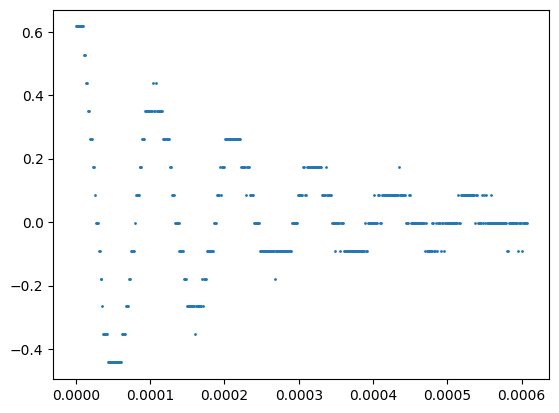

In [ ]:
plt.scatter(task4_5Ohm_time,task4_5Ohm_volt, s = 1)


In [ ]:
def f4(t, w, d, Uk):
  return Uk*np.exp(-d*t)*(np.cos(w*t)+ (d/w)*np.sin(w*t))



In [ ]:
popt4, pcov4 = curve_fit(f4, task4_5Ohm_time,task4_5Ohm_volt, p0 = [55022,1666,1] )
popt4, np.sqrt(pcov4[0][0]), np.sqrt(pcov4[1][1]),

(array([5.90095535e+04, 4.82691896e+03, 6.36298164e-01]),
 69.9026729397234,
 96.27319946008404)

In [ ]:
w0 = np.sqrt(popt4[0]**2+popt4[1]**2)
w0

59206.64281293515

In [ ]:

residuals = task4_5Ohm_volt- f4(task4_5Ohm_time, *popt4)
ss_res = np.sum(residuals**2)
ss_tot = np.sum((task4_5Ohm_volt-np.mean(task4_5Ohm_volt))**2)
r_squared = 1 - (ss_res / ss_tot)
r_squared

0.9565969271160043

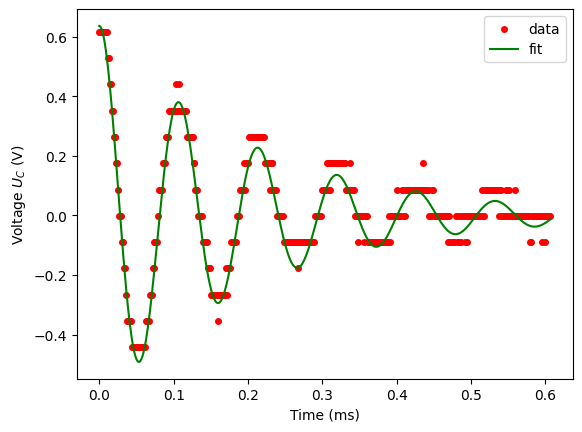

In [ ]:
plt.scatter(1000*task4_5Ohm_time,task4_5Ohm_volt, s = 16, c = 'r', label = 'data')
plt.plot(1000*task4_5Ohm_time,f4(task4_5Ohm_time, *popt4), c = 'g', label = 'fit')
plt.xlabel('Time (ms)')
plt.ylabel('Voltage $U_C$ (V)')
plt.legend()
plt.savefig('Task51', dpi = 500)

In [ ]:
task4_165Ohm.head()

,Time,Channel B
1,-10.005276,5.121006
2,-10.002716,5.121006
3,-10.000156,5.121006
4,-9.997596,4.944609
5,-9.995036,4.944609


In [ ]:
task4_165Ohm_times = np.array(task4_165Ohm['Time'])*10**(-3)

task4_165Ohm_volts = np.array(task4_165Ohm['Channel B'])



In [ ]:
task4_165Ohm_time = np.array(task4_165Ohm['Time'])*10**(-3)
task4_165Ohm_time = task4_165Ohm_time[3870:4000]
task4_165Ohm_time = task4_165Ohm_time - task4_165Ohm_time[0]
task4_165Ohm_volt = np.array(task4_165Ohm['Channel B'])
task4_165Ohm_volt = task4_165Ohm_volt[3870:4000]


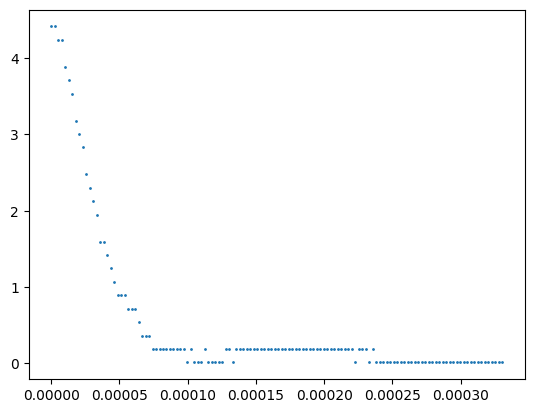

In [ ]:
plt.scatter(task4_165Ohm_time,task4_165Ohm_volt, s = 1)

In [ ]:
def f5(t, d, U):
  return U*np.exp(-d*t)*(1+d*t)


In [ ]:
popt5, pcov5 = curve_fit(f5, task4_165Ohm_time,task4_165Ohm_volt, p0 = [55000,5])
popt5, np.sqrt(pcov5[0][0])

(array([5.79794933e+04, 4.46505259e+00]), 812.6557891536352)

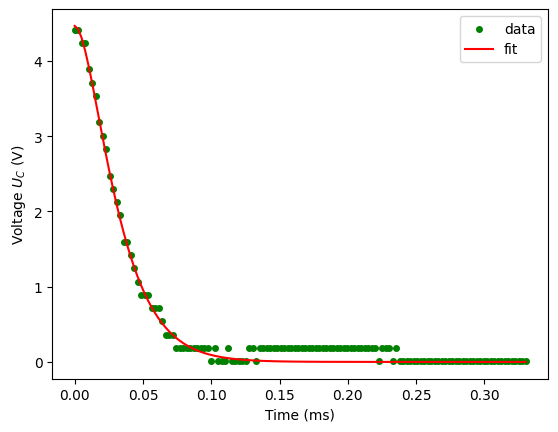

In [ ]:
plt.scatter(1000*task4_165Ohm_time,task4_165Ohm_volt, s = 16, c = 'g', label = 'data')
plt.plot(1000*task4_165Ohm_time,f5(task4_165Ohm_time, *popt5), c = 'r', label = 'fit' )
plt.xlabel('Time (ms)')
plt.ylabel('Voltage $U_C$ (V)')
plt.legend()
plt.savefig('Task52', dpi = 500)

# Task 4




In [ ]:
task4_200Ohm_down = pd.read_csv('https://raw.githubusercontent.com/kundiilona/GP2/E13He/task4_200Ohm_down.csv', delimiter = ',', decimal = '.').drop(axis=0, index=0).astype(float)

In [ ]:
task4_200Ohm_down.head()

,Time,Channel B
1,-50.049883,-0.001221
2,-50.029883,-0.001221
3,-50.009883,-0.001221
4,-49.989883,-0.001221
5,-49.969883,-0.001221


In [ ]:
task4_200Ohm_down_time = np.array(task4_200Ohm_down['Time'])/1000000
task4_200Ohm_down_time = task4_200Ohm_down_time[2511:-1]
task4_200Ohm_down_time = task4_200Ohm_down_time - task4_200Ohm_down_time[0]
task4_200Ohm_down_volt = np.array(task4_200Ohm_down['Channel B'])
task4_200Ohm_down_volt = task4_200Ohm_down_volt[2511:-1]

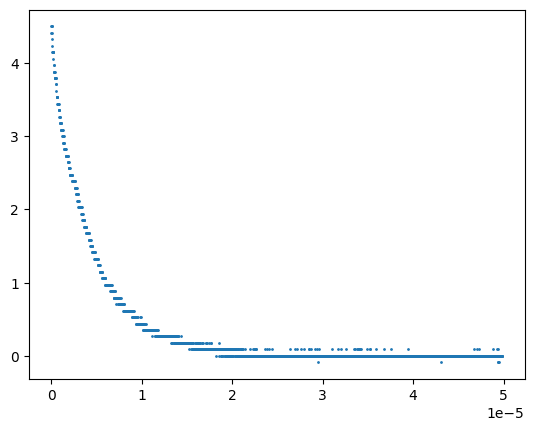

In [ ]:
plt.scatter(task4_200Ohm_down_time,task4_200Ohm_down_volt, s = 1)

In [ ]:
def f44(t, A, q):
  return - A* np.exp(-t/q)

In [ ]:
def f44(t, A, L):
  return - A* np.exp(-422.4*t/L)
popt444, pcov444 = curve_fit(f44, task4_200Ohm_down_time,task4_200Ohm_down_volt, p0 = [-8,4*10**(-3)])
popt444, np.sqrt(pcov444[1][1])

(array([-4.15533842e+00,  1.84748679e-03]), 3.2510496227468943e-06)

In [ ]:
popt44, pcov44 = curve_fit(f44, task4_200Ohm_down_time,task4_200Ohm_down_volt, p0 = [-8,4*10**(-6)])
popt44

array([-4.15533847e+00,  1.84748675e-03])

In [ ]:
np.sqrt(pcov44[1][1])

3.2510469072036143e-06

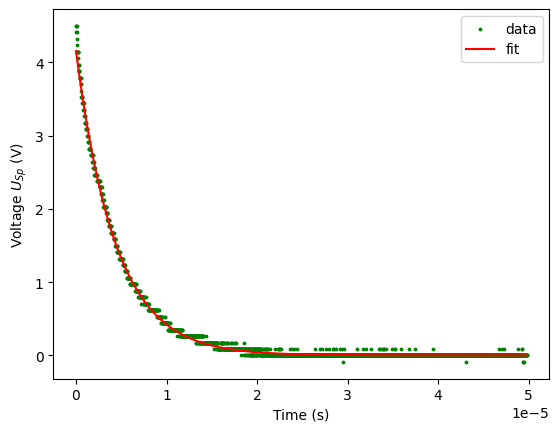

In [ ]:
plt.scatter(task4_200Ohm_down_time,task4_200Ohm_down_volt, s = 3, c = 'g', label = 'data')
plt.plot(task4_200Ohm_down_time, f44(task4_200Ohm_down_time, *popt44), c = 'r', label = 'fit')
plt.xlabel('Time (s)')
plt.ylabel('Voltage $U_{Sp}$ (V)')
plt.legend()
plt.savefig('Task4', dpi = 500)

In [ ]:
L = popt44[1]*(200+220+2.4)
L

0.7803784026448485